In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from sympy import solve
from sympy import Symbol
from math import cos, sin, pi, sqrt, tan, fabs
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from instances.parser import *
from E3PNT.ThreePntEllipse import *
from E3PNT.e3pnt import *
from E3PNT.circumradius import *
from pychebfun import *
import time

%matplotlib notebook
%matplotlib inline

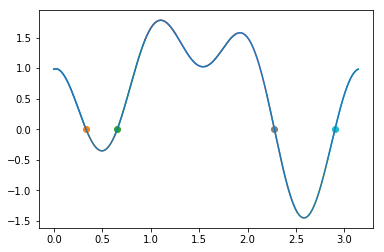

IndexError: list index out of range

In [4]:
I = parse_input('../instances/danft1.txt')
X=I.X
Y=I.Y

n = len(X)
a = I.a[1]
b = I.b[1]
tot = 0
nit = 0
nsols = 0
tott = 0

a = 2.7
b = 1
X = [-.85, .85, -0.1]
Y = [0, 0, -1.72]


for i in range(n):
    for j in range(i+1, n):
        for k in range(j+1, n):
            #sols = e3pnt(a, b, [X[i], X[j], X[k]], [Y[i], Y[j], Y[k]])
            #nsols += len(sols)
            tot += 1
            t1 = time.time()
            
            
            cfuns = get_cheb_poly(a, b, [X[i], X[j], X[k]], [Y[i], Y[j], Y[k]])
            
            for cfun in cfuns:
                l = cfun.domain[0]
                r = cfun.domain[-1]
                
                #plt.axvline(x=r)
                
                xx, yy = cfun.linspace(1000)
                
                roo = list(filter(lambda t: np.isreal(t) and t.real >= l and t.real <= r, cfun.roots()))
                nsols += len(roo)
                
                #print(roo)

                plt.scatter(roo, cfun(np.real(roo)))
                
                
                plt.plot(xx, yy)

            
            #print(cfun)
            
            x = np.linspace(0, pi, 2000)
            tott += time.time() - t1
            
            f1 = np.vectorize(fradius, excluded=[1, 2, 3, 4])
            y1 = f1(x, a, b, [0, X[j]-X[i], X[k]-X[i]], [0, Y[j]-Y[i], Y[k]-Y[i]])
                        
            plt.plot(x, y1)
            plt.savefig(f'ps/{i}{j}{k}.pdf')

            plt.show()
       
                

print(f"Ellipse: ({a}, {b}) and {len(X)} points.")
print(f"Avg. of number of solutions: {nsols}")
print(f"Avg. running time: {tott/tot}")

In [5]:
def isInc(f, x):
    eps=1e-9
    return f(x+eps) > f(x)

from scipy.optimize import minimize_scalar

    
def get_center(theta, a, b, h, x, y):
    #print(theta)
    m = tan(theta)

    B = a**2*m**2 + b**2
    A = 4*a**2*b**2*(1+m**2)
    D = 4*h**2
    c = sqrt((B*A-D*B**2)/A)
    alx = (-a**2*m*c+a*b*sqrt(a**2*m**2+b**2-c**2))/(a**2*m**2+b**2)
    aly = alx * m + c
    px = h * cos(theta)
    py = h * sin(theta)
    bx = alx - px
    by = aly - py
    xc = bx * cos(theta) + by * sin(theta)
    yc = bx * sin(theta) - by * cos(theta)

    return xc, yc

def fk(theta, a, b, h, x, y):

    #print("bla", theta, tu)
    xc, yc = get_center(theta, a, b, h, x, y)
    X = xc-x
    Y = yc-y
    return (X*cos(theta) + Y*sin(theta))**2/a**2 + (X*sin(theta) - Y*cos(theta))**2/b**2 - 1

def g(a, b, h, x, y, tu):   
    
    t1 = time.time()
    
    #res = minimize_scalar(fk, bounds=(0, tu-0.001), method='bounded', args=(a, b, h, x, y))
    #f1 = Chebfun.from_function(lambda t: fk(t, a, b, h, x, y), domain=(0, tu-0.01))
    fp = find_roots(fk, domain=[0, tu-0.00001], args=(a, b, h, x, y))
    
    #print("COEF:", coef)
    ro=fp.roots()
    #print(ro)
    #ro=[]
    #fp = np.poly1d(np.flip(fp.coef))
    
    #print(fp)
    
    
    #res = find_roots(fk, 0, tu-0.001, 0, (a, b, h, x, y))
    #print(res)
    
    
    arr = np.linspace(0.0001, max(tu-0.00001, 0.0001), 2000)
    ds = [fk(t, a, b, h, x, y) for t in arr]
    d2 = [fp(t) for t in arr]


    plt.plot(arr, ds)
    #plt.plot(arr, d2)
    
    nsols = len(ro)
    
    for s in ro:
        if not np.iscomplex(s) and s.real > 0 and s.real < tu:
            
            plt.scatter([s.real], [fp(s.real)])
    
    plt.show()
    return time.time()-t1, nsols
    
    